## Creating the GoogleBuzz Metric

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("match_df.csv") #Get DF from previous notebook
df = df.drop("Unnamed: 0",axis = 1)
df = df.drop("Unnamed: 0.1",axis = 1)

## Look For Missing Players (skip this section)

In [ ]:
test = df #find missing players
missing_players = []
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        missing_players.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        missing_players.append(tuple([opponent,year,month]))
missing_players.to_csv("Missing_players")

In [ ]:
missing_player_monthly = [] #looks for missing player months
for player,opponent,year,month,day,win in zip(test["player"],test["opponent"],test["year"],test["month"],test["day"],test["win"]):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
    prev_year = year-1
    try:
        player_daily = pd.read_csv("players 2014-2022/{}.csv".format(player))
    except:
        missing_player_monthly.append(tuple([player,year,month]))
    try:
        opp_daily = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    except:
        missing_player_monthly.append(tuple([opponent,year,month]))
missing_player_monthly.to_csv("Missing_player_months.csv)"

In [2]:
from calendar import monthrange

def CalculateGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
  #  print(player,opponent,year,month,day)
   # print(player,year,month,day)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    try:
        player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    except:
        return(np.nan)
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = np.log(player_GB+1) - np.log(opponent_GB+1)
    else:
        GoogleBuzz = np.log(opponent_GB+1) - np.log(player_GB+1)
    return(GoogleBuzz)

In [ ]:
def RevisedGoogleBuzz(player,opponent,year,month,day,win):
    player,opponent,year,month,day,win = str(player),str(opponent),int(year),int(month),int(day),int(win)
    prev_year = year-1
    if day == 1:
        if month == 1:
            month = 12
        else:
            month = month-1
        day = (monthrange(year, month))[1]
    else:
        day = day-1
    player_monthly = pd.read_csv("players 2014-2022/{}.csv".format(player))
    try:
        player_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(player,year,month,player))
    except:
        print("players/{}/{}_{}_{}.csv".format(player,year,month,player))
        return(np.nan)
    try:
        player_monthly["date"] = pd.to_datetime(player_monthly["date"])
    except:
        return(np.nan)
    player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]<="{}-{}-01".format(year,month)]
    player_monthly = player_monthly[player_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    player_max_month = player_monthly["{}".format(player)].max()
    try:
        player_month_scaler = 100/player_max_month
    except:
        return(np.nan)
    player_monthly["{}".format(player)] = player_monthly["{}".format(player)]*player_month_scaler
    try: 
        player_daily["date"] = pd.to_datetime(player_daily["date"])
    except:
        return(np.nan)
    player_daily_mean = player_daily["{}".format(player)].mean()
    try:
        player_daily_scaler = float(player_monthly.loc[player_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(player)])/player_daily_mean
    except:
        print(player,opponent,year,month,day)
        return(np.nan)
    player_daily["{}".format(player)] = player_daily["{}".format(player)]*player_daily_scaler
    player_GB = float(player_daily.loc[player_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(player)])
    
    opp_monthly = pd.read_csv("players 2014-2022/{}.csv".format(opponent))
    try:
        opp_daily = pd.read_csv("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
    except:
        print("players/{}/{}_{}_{}.csv".format(opponent,year,month,opponent))
        return(np.nan)
    try:
        opp_monthly["date"] = pd.to_datetime(opp_monthly["date"])
    except:
        return(np.nan)
    opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]<="{}-{}-01".format(year,month)]
    opp_monthly = opp_monthly[opp_monthly["date"]>="{}-{}-01".format(prev_year,month)]
    opp_max_month = opp_monthly["{}".format(opponent)].max()
    try:
        opp_month_scaler = 100/opp_max_month
    except:
        return(np.nan)
    opp_monthly["{}".format(opponent)] = opp_monthly["{}".format(opponent)]*opp_month_scaler
    try:
        opp_daily["date"] = pd.to_datetime(opp_daily["date"])
    except:
        return(np.nan)
    opp_daily_mean = opp_daily["{}".format(opponent)].mean()
    opp_daily_scaler = float(opp_monthly.loc[opp_monthly["date"]=="{}-{}-01".format(year,month)]["{}".format(opponent)])/opp_daily_mean
    opp_daily["{}".format(opponent)] = opp_daily["{}".format(opponent)]*opp_daily_scaler
    opponent_GB = float(opp_daily.loc[opp_daily["date"]=="{}-{}-{}".format(year,month,day)]["{}".format(opponent)])
    if win == 1:
        GoogleBuzz = (player_GB) - (opponent_GB)
    else:
        GoogleBuzz = (opponent_GB) - (player_GB)
    return(GoogleBuzz)

In [ ]:
test = df #calculate ABS GoogleBuzz (will take ages)
test["googlebuzz"] = [RevisedGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

In [ ]:
#Calculate Log Googlebuzz (also takes ages)
test["originalgooglebuzz"] = [CalculateGoogleBuzz(player,opponent,year,month,day,win) for player,opponent,year,month,day,win in zip((test["player"]),(test["opponent"]),(test["year"]),(test["month"]),(test["day"]),(test["win"]))]

In [ ]:
test.to_csv("GoogleBuzzDF.csv")


In [5]:
test = pd.read_csv("GoogleBuzzDF.csv")

In [7]:
sort_g = test.sort_values("googlebuzz") #Corrects for an error within the calculations (super stupid on my behalf)
#Calculations double reverse the GoogleBuzz metric (meaning for a single matchID both players will have the same Buzz Factor when it should be reversed,
#however adjusting things get really weird, so this is the mitigation used currently
#When trying to correct i get a bunch of NAN so this is the solution
sort_g["googlebuzz"] = np.where(sort_g["win"] == 0, -sort_g["googlebuzz"], sort_g["googlebuzz"])
sort_g["originalgooglebuzz"] = np.where(sort_g["win"] == 0, -sort_g["originalgooglebuzz"], sort_g["originalgooglebuzz"])
google_df = sort_g

## Wiki vs GoogleBuzz

In [8]:
google_df["wikibuzz"].describe()

count    20932.000000
mean        -0.000029
std          1.392972
min         -6.931947
25%         -0.844259
50%          0.000000
75%          0.844259
max          6.931947
Name: wikibuzz, dtype: float64

In [9]:
google_df["googlebuzz"].describe()

count    18840.000000
mean        -0.012514
std        209.537913
min      -3049.041096
25%        -33.370687
50%          0.000000
75%         33.370687
max       3049.041096
Name: googlebuzz, dtype: float64

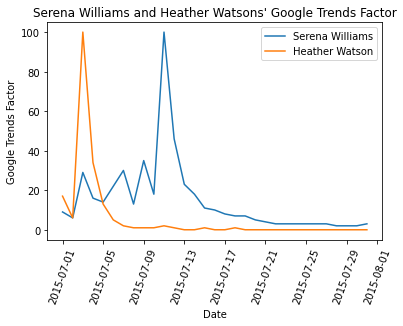

In [10]:
Serena = pd.read_csv("players/Serena Williams/2015_7_Serena Williams.csv")
Heather = pd.read_csv("players/Heather Watson/2015_7_Heather Watson.csv")
Serena["date"] = pd.to_datetime(Serena["date"])
Heather["date"] = pd.to_datetime(Heather["date"])
plt.plot(Serena["date"],Serena["Serena Williams"],label = "Serena Williams")
plt.plot(Heather["date"],Heather["Heather Watson"],label = "Heather Watson")
plt.title("Serena Williams and Heather Watsons' Google Trends Factor")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.xticks(rotation=70)
plt.legend()
plt.show()

Text(0.5, 0, 'Buzz Factor')

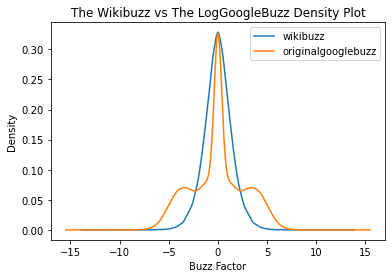

In [11]:
pd.DataFrame(google_df[["wikibuzz","originalgooglebuzz"]]).plot(kind='density')
plt.title("The Wikibuzz vs The LogGoogleBuzz Density Plot")
plt.xlabel("Buzz Factor")

In [12]:
winner_df = google_df[google_df["win"]==1]
loser_df = google_df[google_df["win"]==0]

<AxesSubplot:ylabel='Density'>

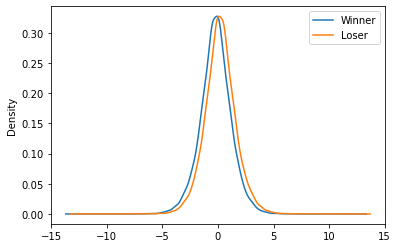

In [13]:
x = pd.DataFrame()
x = list(winner_df["wikibuzz"])
y = list(loser_df["wikibuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
win_lose
pd.DataFrame(win_lose[["Winner","Loser"]]).plot(kind='density')

<AxesSubplot:ylabel='Density'>

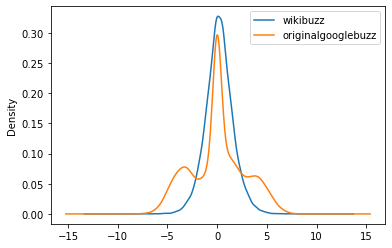

In [14]:
pd.DataFrame(loser_df[["wikibuzz","originalgooglebuzz"]]).plot(kind='density')

(-15.0, 15.0)

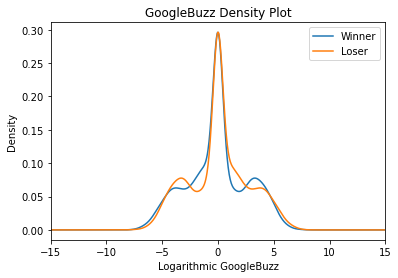

In [15]:
google_df_win = google_df[google_df["win"]==1]
google_df_lose = google_df[google_df["win"]==0]
x = list(google_df_win["originalgooglebuzz"])
y = list(google_df_lose["originalgooglebuzz"])
win_lose = pd.DataFrame({"Winner":x,"Loser":y})
pd.DataFrame(win_lose[["Winner","Loser"]]).plot(kind='density')
plt.title("GoogleBuzz Density Plot")
plt.xlabel("Logarithmic GoogleBuzz")
#plt.axvline(x = -0.062497, color = 'b', label = 'Winner Mean')
#plt.axvline(x =  0.061942, color = 'r', label = 'Loser Mean')
plt.xlim([-15,15])

## Plots for the Weird Bets Found

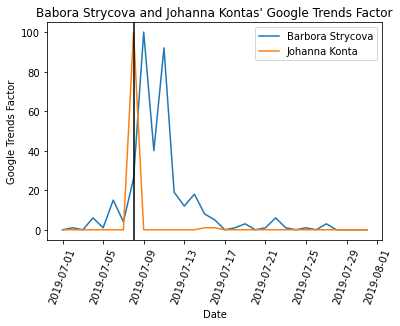

In [16]:
Strycova = pd.read_csv("players/Barbora Strycova/2019_7_Barbora Strycova.csv")
Konta = pd.read_csv("players/Johanna Konta/2019_7_Johanna Konta.csv")
Strycova["date"] = pd.to_datetime(Strycova["date"])
Konta["date"] = pd.to_datetime(Konta["date"])
plt.plot(Strycova["date"],Strycova["Barbora Strycova"],label = "Barbora Strycova")
plt.plot(Konta["date"],Konta["Johanna Konta"],label = "Johanna Konta")
plt.title("Babora Strycova and Johanna Kontas' Google Trends Factor")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.legend()
plt.xticks(rotation=70)
plt.axvline(dt.datetime(2019, 7, 8),color = "black")
#plt.plot_date(x = '2019-07-08', y = 0)
#plt.vline(datetime.strptime("2019-7-8"))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

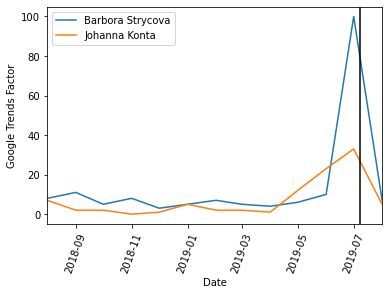

In [17]:
yearly_konta = pd.read_csv("players 2014-2022/Johanna Konta.csv")
yearly_strycova = pd.read_csv("players 2014-2022/Barbora Strycova.csv")
yearly_konta["date"] = pd.to_datetime(yearly_konta["date"])
yearly_strycova["date"] = pd.to_datetime(yearly_strycova["date"])
plt.plot(yearly_strycova["date"],yearly_strycova["Barbora Strycova"],label = "Barbora Strycova")
plt.plot(yearly_konta["date"],yearly_konta["Johanna Konta"],label = "Johanna Konta")
plt.xlabel("Date")
plt.ylabel("Google Trends Factor")
plt.legend()
plt.xticks(rotation=70)
plt.xlim([dt.datetime(2018, 8, 1),dt.datetime(2019, 8, 1)])
plt.axvline(dt.datetime(2019, 7, 8),color = "black")
plt.show